## Ch. 2 - Multi-Arm Bandit

In epsilon-greedy action selection, for the case of two actions and epsilon= 0.5, what is
the probability that the greedy action is selected?

In [58]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

print("START.")

START.


Solving the multi-arm bandit

- Problem
    - We have `n_arms=10` arms
    - Each arm has a probability of getting +1 reward


Action:  0
Action:  4
Action:  4
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  9
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  0
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  7
Action:  1
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  6
Action:  8
Action:  1
Action:  6
[0.16805518 0.45910156 0.54926046 0.91546765 0.66219861 0.09252366
 0.98296339 0.06803005 0.43540748 0.80314722]


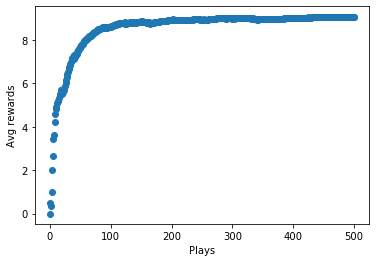

In [59]:
n_arms = 10
probs = np.random.rand(n_arms) # for each arm, a probability to get +1 reward
record = np.zeros((n_arms,2)) # n pairs (num times arm pulled, running avg reward)

def get_reward(prob, n=10):
    reward = 0
    for i in range(n): 
        if random.random() < prob: reward += 1
    return reward

def update_record(record, action, r):
    new_r = (record[action,0] * record[action,1] + r) / (record[action,0] + 1)
    record[action,0] += 1
    record[action,1] = new_r
    return record

def get_best_arm(record): 
    return np.argmax(record[:,1], axis=0)

fig, ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg rewards")

rep = 500 # number of repetitions
eps = 0.1 # for epsilon-greedy

rewards = [0]

# Main loop for the n-armed bandit game
for i in range(rep):
    # Epsilon-greedy selection of action
    if random.random() > eps:
        choice = get_best_arm(record)
    else: 
        choice = np.random.randint(n_arms)
    if i % 10 == 0: print("Action: ", choice)
    r = get_reward(probs[choice])
    record = update_record(record, choice, r)
    mean_reward = ((i + 1) * rewards[-1] + r) / (i + 2)
    rewards.append(mean_reward)
    
ax.scatter(np.arange(len(rewards)), rewards)

print(probs)